# Foot traffic data cleaning process and extraction of cities

In [1]:
import pandas as pd
import numpy as np
import os
import data_cleaning_methods

import seaborn as sns
import matplotlib.pyplot as plt

## VI. Apple Moblity Data v2

In [2]:
path = '../../data/raw/mobility/Apple_Mobility_Reports/applemobilitytrends.csv'

df_apple = pd.read_csv(path)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_apple.geo_type.unique()

array(['country/region', 'city', 'sub-region', 'county'], dtype=object)

Metropolitan areas of interest:

In [4]:
msa = { '35620': 'New York-Newark-Jersey City',
        '31080': 'Los Angeles-Long Beach-Anaheim',
        '16980': 'Chicago-Naperville-Elgin',
        '19100': 'Dallas-Fort Worth-Arlington',
        '26420': 'Houston-The Woodlands-Sugar Land',
        '47900': 'Washington-Arlington-Alexandria',
        '33100': 'Miami-Fort Lauderdale-Pompano Beach',
        '37980': 'Philadelphia-Camden-Wilmington',
        '12060': 'Atlanta-Sandy Springs-Alpharetta',
        '38060': 'Phoenix-Mesa-Chandler',
        '14460': 'Boston-Cambridge-Newton',
        '41860': 'San Francisco-Oakland-Berkeley',
        '40140': 'Riverside-San Bernardino-Ontario',
        '19820': 'Detroit-Warren-Dearborn',
        '42660': 'Seattle-Tacoma-Bellevue'}

In [5]:
cities = df_apple.region.unique()
#Look the name of the cities in the data
# for city in cities:
#     print(city) 

In [6]:
sf_df = df_apple[df_apple.region == 'San Francisco - Bay Area']
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 777 to 779
Columns: 366 entries, geo_type to 2021-01-06
dtypes: float64(360), object(6)
memory usage: 8.6+ KB


In [7]:
sf_drv_df = sf_df[sf_df.transportation_type == 'driving'].loc[:, '2020-01-13':]
sf_trn_df = sf_df[sf_df.transportation_type == 'transit'].loc[:, '2020-01-13':]
sf_wlk_df = sf_df[sf_df.transportation_type == 'walking'].loc[:, '2020-01-13':]

In [8]:
sf_drv_df = pd.melt(sf_drv_df, var_name='date', value_name='drv')
sf_trn_df = pd.melt(sf_trn_df, var_name='date', value_name='trn')
sf_wlk_df = pd.melt(sf_wlk_df, var_name='date', value_name='wlk')

In [9]:
sf_df = sf_drv_df.merge(sf_trn_df).merge(sf_wlk_df)
sf_df['date'] = pd.to_datetime(sf_df['date'])

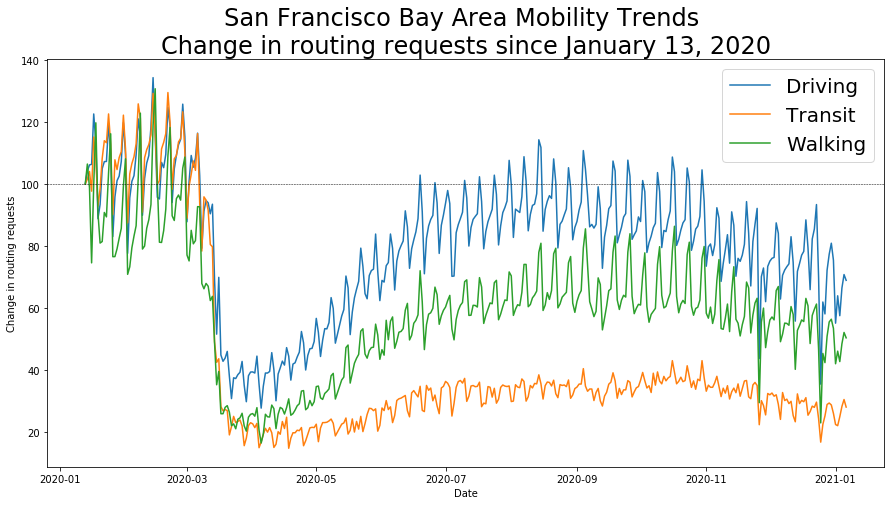

In [10]:
f, ax = plt.subplots(figsize=(15, 7.5))
_ = plt.rcParams.update({'font.size': 20})
_ = sns.lineplot(data=sf_df, x='date', y='drv', label='Driving')
_ = sns.lineplot(data=sf_df, x='date', y='trn', label='Transit')
_ = sns.lineplot(data=sf_df, x='date', y='wlk', label='Walking')
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline', lw=0.5)
_ = plt.xlabel('Date')
_ = plt.ylabel('Change in routing requests')
_ = plt.title('San Francisco Bay Area Mobility Trends \nChange in routing requests since January 13, 2020')

Now, replicate to all the potential cities of interest:

In [11]:
list_cities = ['New York City', 'Los Angeles', 'Houston', 'Detroit', 'Dallas', 
               'Boston', 'Philadelphia', 'Miami', 'Chicago', 'San Diego', 
               'Seattle', 'San Francisco - Bay Area']

In [12]:
df_list = []

for city in list_cities:
    df = df_apple[df_apple.region == city]
    
    drv_df = df[df.transportation_type == 'driving'].loc[:, '2020-01-13':]
    trn_df = df[df.transportation_type == 'transit'].loc[:, '2020-01-13':]
    wlk_df = df[df.transportation_type == 'walking'].loc[:, '2020-01-13':]

    drv_df = pd.melt(drv_df, var_name='date', value_name='drv')
    trn_df = pd.melt(trn_df, var_name='date', value_name='trn')
    wlk_df = pd.melt(wlk_df, var_name='date', value_name='wlk')

    df = drv_df.merge(trn_df).merge(wlk_df)
    df['date'] = pd.to_datetime(df['date'])
    df['city'] = city
    
    df_list.append(df)

In [13]:
df_result = pd.concat(df_list, ignore_index=True)

In [14]:
df_result.to_csv('../../data/interim/mobility/apple_mobility_cities.csv')